![Banner del curso](https://docs.google.com/uc?export=download&id=1v9oXzOC5J_zT3_QLaVC47qIy67U1CO6b)

#Inferencia sobre los datos

Este notebook es la recopilacion de todos los temas vistos de la parte teorica para el de analisis de datos. Lo principal es ir a poco a poco viendo la aplicacion de estos conceptos en lo que hemos visto. Los datos con los que vamos a trabajar corresponden a datos entregados por el Instituto Nacional de Salud (SIVIGILA) de Colombia y contiene los datos de las enfermedades en el area de Santander.

# Importacion de elementos

### Importacion de librerias necesarias

In [0]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from IPython.display import clear_output
from IPython.display import HTML
warnings.filterwarnings('ignore')
%matplotlib inline

### Importacion de los datos al computador

In [0]:
# Descargo los datos en mi maquina virtual
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1i3tbN08QrLAfGY-RHNhYhJbSeuzi7jHp' -O data_salud.xlsx
clear_output()

df = pd.read_excel('data_salud.xlsx')

# Manos a la obra
**"La cosa mas dificil en la vida es conocerte a ti mismo"** - Tales de Mileto

### Entendiendo el dataset

- Generalmente no decimos que conocer los datos es lo mas dificil en Big Data, pero realmente siempre es lo de mayor consumo de tiempo.
- No trates de aprender a nadar antes de saltar en el agua.

### Pasos generales para el analisis de datos
1. <b>Comprender el problema </b>: Examinaremos cada variable y haremos un análisis filosófico sobre su significado e importancia para este problema.
2. <b>Estudio univariable </b>: Nos centraremos en la variable dependiente ('Precio de venta') y trataremos de saber un poco más sobre ella.
3. <b>Estudio multivariable </b>: Intentaremos entender cómo se relacionan las variables dependientes e independientes.
4. <b>Limpieza básica </b>: Limpiaremos el conjunto de datos y manejaremos los datos faltantes, los valores atípicos y las variables categóricas.
5. <b>Pruebas sobre preguntas</b>: Comprobaremos si nuestros datos cumplen con las suposiciones requeridas por la mayoría de las técnicas multivariadas.

### Variables de nuestro Dataset

In [0]:
df.columns

Index(['cod_eve', 'grupo', 'fec_not', 'semana', 'año', 'cod_pre', 'cod_sub',
       'repet', 'grupo etario', 'grupo edad', 'Ciclo de vida', 'sexo_',
       'cod_pais_o', 'cod_dpto_o', 'cod_mun_o', 'codigomunicipio', 'area_',
       'localidad_', 'cen_pobla_', 'vereda_', 'bar_ver_', 'Comuna',
       'ocupacion_', 'tip_ss_', 'cod_ase_', 'aseguradora', 'per_etn_',
       'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela', 'gp_gestan',
       'gp_indigen', 'gp_pobicbf', 'gp_mad_com', 'gp_desmovi', 'gp_psiquia',
       'gp_vic_vio', 'gp_otros', 'cod_dpto_r', 'cod_mun_r', 'fec_con_',
       'ini_sin_', 'tip_cas_', 'pac_hos_', 'fec_hos_', 'con_fin_', 'fec_def_',
       'ajuste_', 'cer_def_', 'cbmte_', 'uni_modif', 'nuni_modif',
       'fec_arc_xl', 'nit_upgd', 'fm_fuerza', 'fm_unidad', 'fm_grado',
       'version', 'nom_eve', 'nom_upgd', 'ndep_proce'],
      dtype='object')

### Problema
En estos ultimos 4 años hemos tenidos mas de 15000 infecciones transmitidas por mosquitos, de los cuales el 23% de los casos son jovenes y aproximadamente se tienen 20 casos por semana.

Con los siguientes datos:
- ¿Es posible trabajar sobre los datos?
- ¿Se pueden hacer inferencias sobre los datos?
- ¿Son validos estos datos para realizar predicciones y clasificaciones?
- ¿Como categoriza estos datos (Integrales, correctos pero incompletos, incompletos pero correctos, corrupto, etc)?
- ¿Cree posible ser usados para predecir en diciembre donde va ocurrir un caso de infeccion?
- ¿Es posible que si se presenta un nuevo caso de enfermedad se determine a que caso de las enfermedades Chika, Chikunguña o Zika pertenece?

### Compresion del problema (Actividad del estudiante)

![](https://docs.google.com/uc?export=download&id=1NW0gB2JI_IETYqo6WfY3dGxPFCj7vI-1)

#### Inspeccion y primeras preguntas
Para poder entender nuestros datos, podemos mirar cada variable y tratar de entender su significado y relevancia para este problema. Sé que esto lleva mucho tiempo, pero nos dará el sabor de nuestro conjunto de datos.

Para tener un poco de disciplina en nuestro análisis, podemos crear una **hoja de cálculo de Excel** con las siguientes columnas:

* <b>Variable</b> - Nombre de la variable.
* <b>Tipo</b> - Identificación del tipo de las variables. Hay dos valores posibles para este campo: <u>numérico</u> o <u>categórico</u>. Por "numéricas" entendemos las variables cuyos valores son números, y por "categóricas" las variables cuyos valores son categorías.
* <b>Categoria</b> - Identificación de la categoria de las variables. Las categorias propuesta son <u>perfilacion social</u>,  <u>perfilacion de salud</u> y <u>papeleo y tramites</u>. Cabe aclarar que puedes PROPONER TUS PROPIAS CATEGORIAS si ves alguna fuera de las 3 o no estas de acuerdo en dejar una dentro de las 3. Asi mismo pueden haber variables dentro de 2 categorias y demas.
* <b>Expectativa</b> - Nuestra expectativa sobre la influencia de la variable en "SalePrice". Podemos utilizar una escala categórica con los valores "Alto", "Medio" y "Bajo" como posibles valores.
* <b>Conclusiones</b> - Nuestras conclusiones sobre la importancia de la variable, después de dar un vistazo rápido a los datos. Podemos mantener la misma escala categórica de "Expectativa".
* <b>Comentarios</b> - Cualquier comentario general que se nos ocurra.

#### Momento de nuestras primeras preguntas
En esta seccion nos vamos a enfocar en la columna "Expectativa" ya que nos ayudara a desarrollar un **sexto sentido** para el manejo de los datos. 

##### Preguntas para el estudiante
Responda las siguientes preguntas de forma conciente

- **¿Para que tuve que sacar tipo y categoria de la variable?**

- **¿Es posible trabajar sobre los datos?**

- **¿Se pueden hacer inferencias sobre los datos?**

- **¿Son validos estos datos para realizar predicciones y clasificaciones?**

- **¿Como categoriza estos datos (Integrales, correctos pero incompletos, incompletos pero correctos, corrupto, etc)?**

- **¿Noto redundancia en los datos? ¿Donde?**

- **¿Cual es la variable objetivo, o la variable dependiente de las demas?**

#### Seleccion de variables (Primera inferencia)
Ahora es momento despues de hacernos estas preguntas y muchas otras mas, que variables realmente las vamos a usar, cuales vamos a ignorar y cuales vamos a dejar en espera.

Después de este ejercicio desalentador, podemos filtrar la hoja de cálculo y mirar cuidadosamente las variables con "Expectativa" alta. Entonces, podemos apresurarnos en hacer algunos gráficos de dispersión entre esas variables y nuestra variable independiente, llenando la columna "Conclusión" que es sólo la corrección de nuestras expectativas.

**Enumera las variables que creen que juegan un rol importante en este problema**

- nom_eve
- ndep_proce
- ini_sin_
- tip_cas_
- ocupacion_
- Comuna
- cod_mun_o 
- cod_dpto_o
- cod_pais_o
- sexo_
- ciclo de vida
- fec_not
- ocupacion_
- pert_etn
- localidad_

#### ¿Que pasa si nuestro dataset no tiene documentacion?

![](https://i.ytimg.com/vi/oK4aMNCbBC4/hqdefault.jpg)

Siendo realistas, la mayoria de datos no estan documentados (Por eso existe esta ciencia y es tan importante) 

**La manera mas intuitiva de generar los pasos anterior es sacando relaciones de todas las variables anteriores por medio de graficos**

##### ¿Como realizar esas visualizaciones?
Empezando en este campo la visualizacion anterior es utopica pero no inalcanzable (practica y experiencia son ayudas fundamentales en este campo), para facilitar las cosas vamos a hablar de nuestra querida herramienta **pandas_profiling**.

In [3]:
report = pp.ProfileReport(df)
report.to_file(outputfile="Datos_iniciales_salud.html")
HTML(filename='Datos_iniciales_salud.html')

Number of variables,62
Number of observations,14238
Total Missing (%),14.5%
Total size in memory,6.7 MiB
Average record size in memory,496.0 B
Numeric,32
Categorical,20
Boolean,3
Date,4
Text (Unique),0
Rejected,2


### Matriz de Correlacion

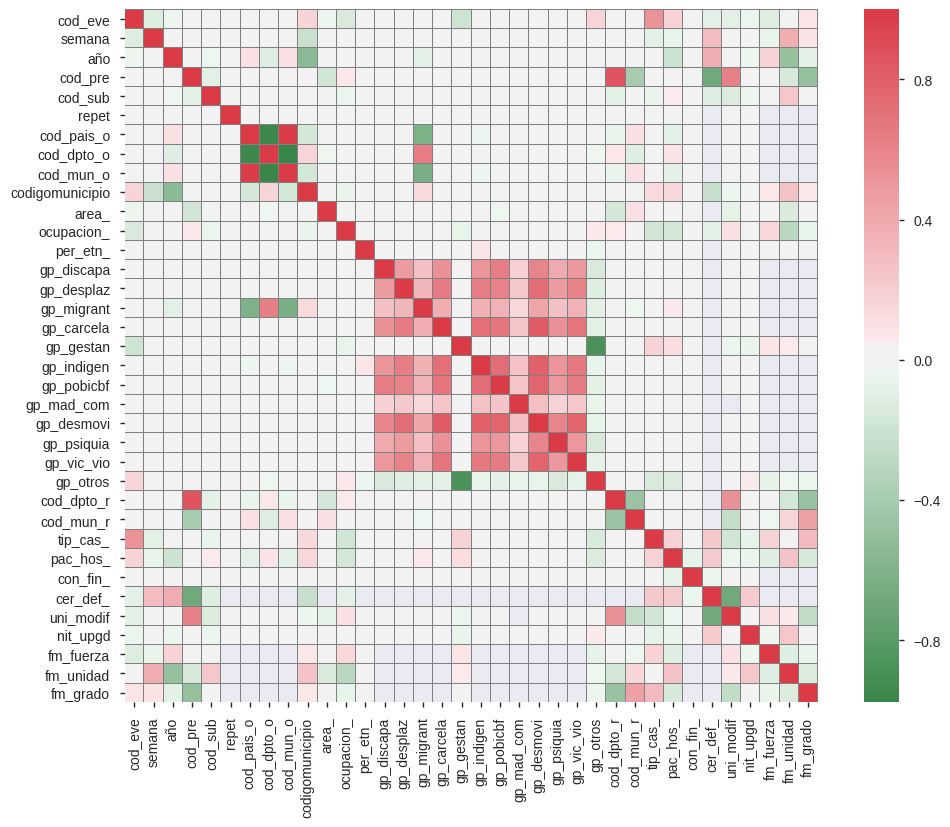

In [4]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
color = sns.diverging_palette(133, 10, as_cmap=True)
sns.heatmap(corrmat, square=True, cmap=color, annot=False, linecolor='grey', linewidths=0.01);

### Limpieza Basica (Llamado transformaciones)
Para empezar nuestra limpieza basica lo que debemos tener en cuenta son dos cosas:
- Valores nulos en nuestro dataset
- Valores categoricos con String o Numericos altos

#### Valores invalidos
**¿Como rellenar los valores invalidos?**

In [5]:
df.isna().sum()

cod_eve           0
grupo             0
fec_not           0
semana            0
año               0
              ...  
fm_grado      14153
version           0
nom_eve           0
nom_upgd          0
ndep_proce        0
Length: 62, dtype: int64

In [6]:
df.isna().sum().values.sum()

128044

In [7]:
df.fillna("ztr",inplace=True)
df.isna().sum().values.sum()

0

#### Modificacion de valores dentro de una columna


In [0]:
#Ejecutar solamente si vas a convertir las columnas con fechas en 3 columnas nuevas

#Convertir las columnas de fechas en 3 columnas nuevas
columnas = df.dtypes[df.dtypes == 'datetime64[ns]'].index.tolist() #para cuando las columnas estan definidas en tipo de fecha
for columna in columnas:
  df['{}_year'.format(columna)] = df[columna].dt.year
  df['{}_month'.format(columna)] = df[columna].dt.month
  df['{}_day'.format(columna)] = df[columna].dt.day
  df.drop(columna, axis=1, inplace=True)

In [0]:
#Convertir el tipo de dato de cada celda de una columna a valores conocidos
for i in range(df.shape[0]):
  df.at[i,"fec_hos_"] = str(df.at[i,"fec_hos_"])

#### LabelEncoder
Consiste en convertir cada valor diferente de una columna a un numero empezando desde 0. Para mas informacion sobre este metodo puede referirse a la [documentacion del LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [13]:
#Transformar una columna unitaria
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df["Ciclo de vida"])
df.head()

[2 3 0 1 1]


,cod_eve,grupo,fec_not,semana,año,cod_pre,cod_sub,repet,grupo etario,grupo edad,Ciclo de vida,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,codigomunicipio,area_,localidad_,cen_pobla_,vereda_,bar_ver_,Comuna,ocupacion_,tip_ss_,cod_ase_,aseguradora,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,cod_dpto_r,cod_mun_r,fec_con_,ini_sin_,tip_cas_,pac_hos_,fec_hos_,con_fin_,fec_def_,ajuste_,cer_def_,cbmte_,uni_modif,nuni_modif,fec_arc_xl,nit_upgd,fm_fuerza,fm_unidad,fm_grado,version,nom_eve,nom_upgd,ndep_proce
0,210,ENFERMEDADES TRANSMITIDAS POR VECTORES,2015-01-04,1,2015,6800100431,1,0,10 a 14,7 a 11,Infancia,M,170,68,1,68001,1,URBANA,ztr,ztr,LAGOS DEL CACIQUE,16 LAGOS DEL CACIQUE,9997,C,EPS130,EPS COLSANITAS,6,2,2,2,2,2,2,2,2,2,2,2,1,68,1,2015-01-04,2015-01-04,2,1,2015-01-04 00:00:00,1,- -,3,ztr,ztr,6.8001e+11,CLINICA MATERNO INFANTIL SAN LUIS SA,2016-01-15,8.90209e+09,ztr,ztr,ztr,SIVIGILA - 2015 - 15.1.0,DENGUE,CLINICA MATERNO INFANTIL SAN LUIS SA,SANTANDER
1,210,ENFERMEDADES TRANSMITIDAS POR VECTORES,2015-01-05,1,2015,6800101628,3,0,20 a 29,18 a 28,Jovenes,F,170,68,1,68001,1,URBANA,ztr,ztr,CABECERA DEL LLANO,12 CABECERA DEL LLANO,9997,C,EPS002,SALUD TOTAL S.A. E.P.S.,6,2,2,2,2,2,2,2,2,2,2,2,1,68,1,2015-01-05,2015-01-04,2,2,- -,1,- -,0,ztr,ztr,ztr,ztr,2016-01-15,8.00131e+09,ztr,ztr,ztr,SIVIGILA - 2015 - 15.1.0,DENGUE,SALUD TOTAL SA UUBC,SANTANDER
2,210,ENFERMEDADES TRANSMITIDAS POR VECTORES,2015-01-05,1,2015,5400100470,1,0,15 a 19,12 a 17,Adolescencia,M,170,68,1,68001,1,BUCARAMANGA,ztr,ztr,QUINTA DANIA,13 ORIENTAL,9997,C,EPS037,NUEVA EPS,6,2,2,2,2,2,2,2,2,2,2,2,1,68,1,2015-01-04,2015-01-02,2,2,- -,1,- -,0,ztr,ztr,ztr,ztr,2016-01-15,ztr,ztr,ztr,ztr,SIVIGILA - 2014 - 14.2.0,DENGUE,RETROALIMENTACIÓN,SANTANDER
3,210,ENFERMEDADES TRANSMITIDAS POR VECTORES,2015-01-06,1,2015,6800101366,2,0,30 a 39,29 a 59,Adultez,F,170,68,1,68001,1,BUCARAMANGA,ztr,ztr,VILLA ROSA,1 NORTE,2226,C,EPS013,SALUDCOOP E.P.S.,6,2,2,2,2,2,2,2,2,2,2,2,1,68,1,2015-01-06,2015-01-04,2,2,- -,1,- -,6,ztr,ztr,6.8001e+11,IPS COOMULTRASAN SEDE VII,2016-01-15,8.90201e+09,ztr,ztr,ztr,SIVIGILA - 2015 - 15.1.0,DENGUE,IPS COOMULTRASAN SEDE II,SANTANDER
4,210,ENFERMEDADES TRANSMITIDAS POR VECTORES,2015-01-07,1,2015,6800101666,16,0,30 a 39,29 a 59,Adultez,M,170,68,1,68001,1,ztr,ztr,ztr,LOS COLORADOS,1 NORTE,7129,C,EPS037,NUEVA EPS,6,2,2,2,2,2,2,2,2,2,2,2,1,68,1,2015-01-05,2015-01-04,2,2,- -,1,- -,0,ztr,ztr,ztr,ztr,2016-01-15,8.90205e+09,ztr,ztr,ztr,SIVIGILA - 2015 - 15.1.0,DENGUE,FUNDACION OFTALMOLOGICA DE SANTANDER- SEDE BUC...,SANTANDER


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_label_encoder = np.zeros(df.shape)
for i in range(len(df.columns)):
  try:
    df_label_encoder[:,i] = le.fit_transform(df[df.columns[i]])
  except:
    columna = df[df.columns[i]].values
    strings = []
    numeros = []
    for j in columna:
      if type(j) == str:
        strings.append(j)
      else:
        numeros.append(j)
    strings = np.r_[strings]
    numeros = np.r_[numeros].astype(np.float32)
    columna = np.append(strings, numeros)
    df_label_encoder[:,i] = le.fit_transform(columna)

df_label_encoder = pd.DataFrame(df_label_encoder, columns=df.columns)
df_label_encoder.head()

,cod_eve,grupo,fec_not,semana,año,cod_pre,cod_sub,repet,grupo etario,grupo edad,Ciclo de vida,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,codigomunicipio,area_,localidad_,cen_pobla_,vereda_,bar_ver_,Comuna,ocupacion_,tip_ss_,cod_ase_,aseguradora,per_etn_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_indigen,gp_pobicbf,gp_mad_com,gp_desmovi,gp_psiquia,gp_vic_vio,gp_otros,cod_dpto_r,cod_mun_r,fec_con_,ini_sin_,tip_cas_,pac_hos_,fec_hos_,con_fin_,fec_def_,ajuste_,cer_def_,cbmte_,uni_modif,nuni_modif,fec_arc_xl,nit_upgd,fm_fuerza,fm_unidad,fm_grado,version,nom_eve,nom_upgd,ndep_proce
0,1.0,0.0,0.0,0.0,0.0,139.0,1.0,2.0,1.0,7.0,2.0,1.0,3.0,1.0,1.0,6.0,0.0,396.0,65.0,82.0,592.0,8.0,445.0,0.0,58.0,55.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,14.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,12.0,12.0,13.0,97.0,17.0,0.0,57.0,3.0,15.0,14.0,1.0,2.0,44.0,1.0
1,1.0,0.0,1.0,0.0,0.0,152.0,3.0,2.0,3.0,3.0,3.0,0.0,3.0,1.0,1.0,6.0,0.0,396.0,65.0,82.0,205.0,3.0,445.0,0.0,35.0,89.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,14.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,12.0,12.0,13.0,97.0,64.0,0.0,57.0,3.0,15.0,14.0,1.0,2.0,85.0,1.0
2,1.0,0.0,1.0,0.0,0.0,120.0,1.0,2.0,2.0,1.0,0.0,1.0,3.0,1.0,1.0,6.0,0.0,77.0,65.0,82.0,875.0,4.0,445.0,0.0,51.0,82.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,14.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,12.0,13.0,97.0,64.0,0.0,57.0,3.0,15.0,14.0,0.0,2.0,82.0,1.0
3,1.0,0.0,2.0,0.0,0.0,149.0,2.0,2.0,4.0,5.0,1.0,0.0,3.0,1.0,1.0,6.0,0.0,77.0,65.0,82.0,1153.0,0.0,71.0,0.0,41.0,94.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,14.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,12.0,12.0,13.0,97.0,41.0,0.0,57.0,3.0,15.0,14.0,1.0,2.0,72.0,1.0
4,1.0,0.0,3.0,0.0,0.0,154.0,16.0,2.0,4.0,5.0,1.0,1.0,3.0,1.0,1.0,6.0,0.0,417.0,65.0,82.0,626.0,0.0,290.0,0.0,51.0,82.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,14.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,12.0,12.0,13.0,97.0,64.0,0.0,57.0,3.0,15.0,14.0,1.0,2.0,58.0,1.0


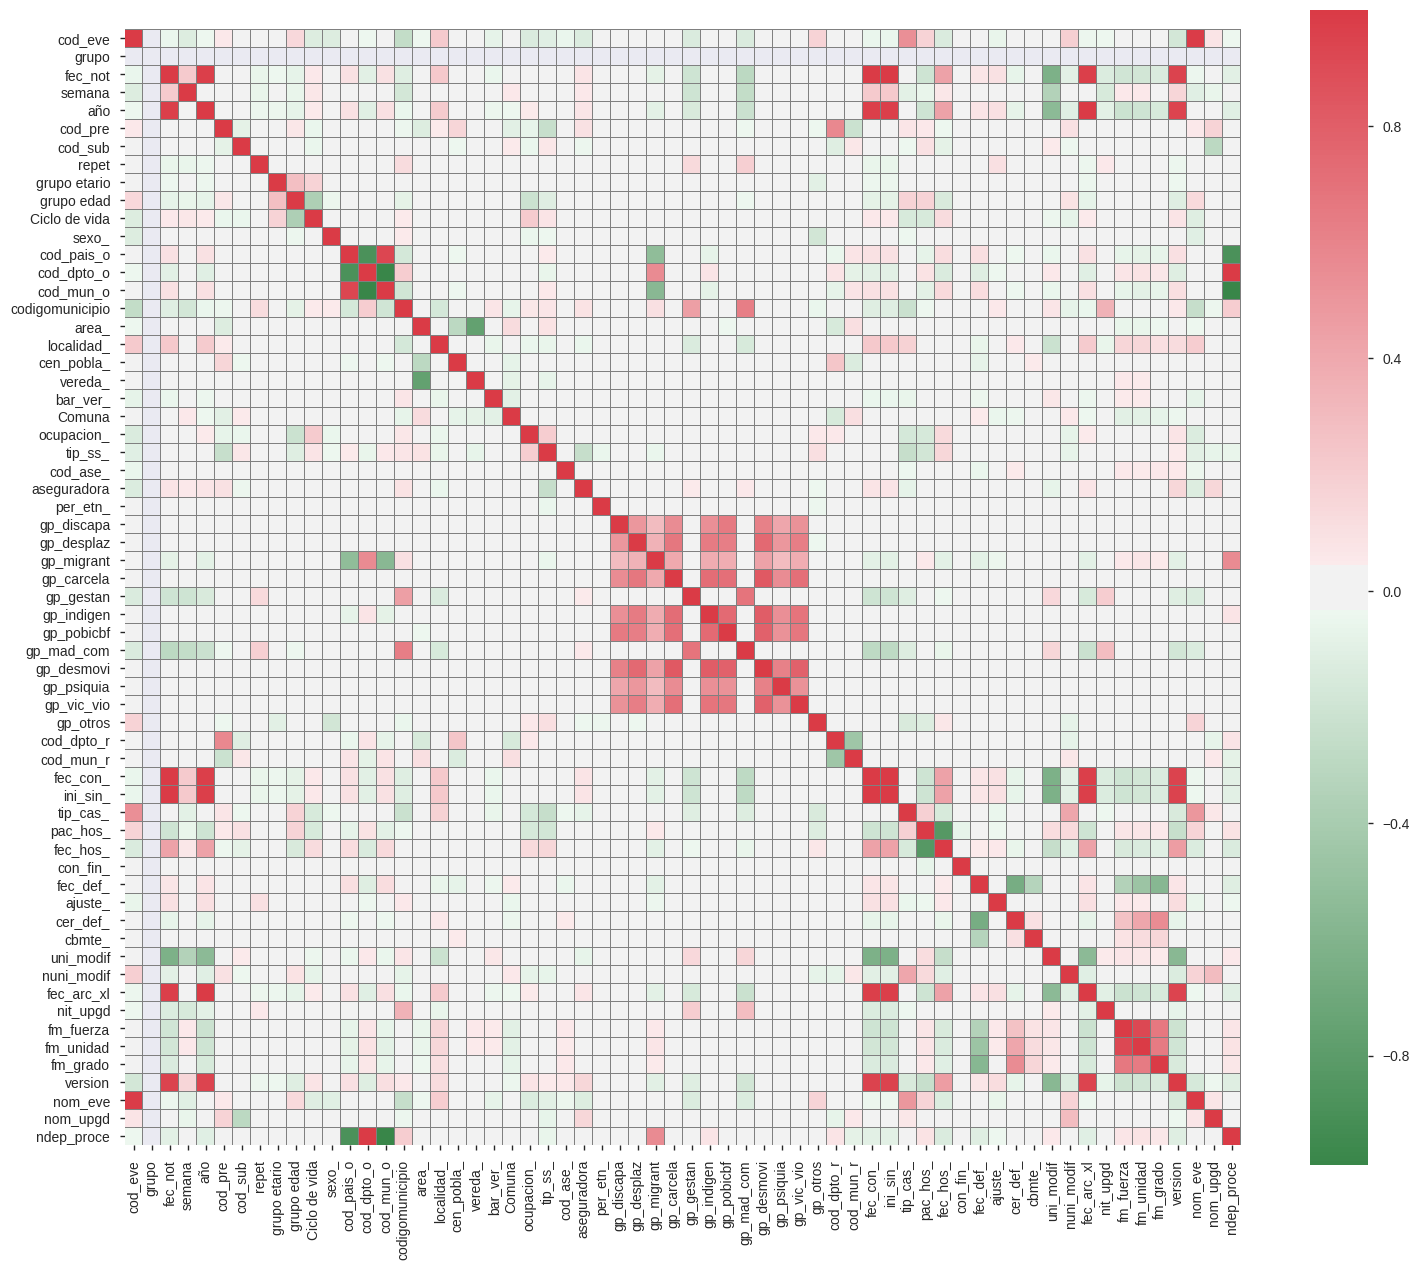

In [10]:
#correlation matrix
corrmat = df_label_encoder.corr()
f, ax = plt.subplots(figsize=(18,15))
color = sns.diverging_palette(133, 10, as_cmap=True)
sns.heatmap(corrmat, square=True, cmap=color, annot=False, linecolor='grey', linewidths=0.01);

In [11]:
corrmat.values[-3]

array([ 0.98862754,         nan, -0.04103309, -0.10616246, -0.03228225,
        0.05946692,  0.00264573, -0.02856035, -0.01779222,  0.13249261,
       -0.11755521, -0.10787823,  0.02745917, -0.03234433,  0.03247721,
       -0.24430861, -0.0357639 ,  0.20586777,  0.01781457,  0.0304654 ,
       -0.0762545 ,  0.02849661, -0.12598681, -0.10131442, -0.04814328,
       -0.12355823,  0.02183195,  0.01422075,  0.01217187, -0.01344951,
        0.00131536, -0.12658169,  0.00811805,  0.00373297, -0.12890867,
        0.0069481 , -0.01274867, -0.00467171,  0.16869375,  0.00330733,
       -0.00709052, -0.04314188, -0.04031073,  0.49640876,  0.16143706,
       -0.12883982,  0.02285922, -0.00897794, -0.05794686,  0.01417581,
        0.0171302 , -0.01591476,  0.17207124, -0.03455356, -0.03153225,
        0.04055171,  0.03513006,  0.02684226, -0.1636512 ,  1.        ,
        0.07115104, -0.03234433])

#### One Hot Encoding
Consiste en crear un vector de booleanos donde cada valor unico de la columna sera una nueva columna contendra 1 (True) o 0 (False) si el valor corresponde a una categoria. Para mas informacion sobre este metodo puede referirse a la [documentacion del OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

In [0]:
#Transformar una columna unitaria
from sklearn.preprocessing import LabelBinarizer

ohe = LabelBinarizer()
X = ohe.fit_transform(df["nombre_columna"])
print(X.shape)
columnas = ["tip_cas_"+str(i) for i in range(X.shape[1])]
df_one_hot_encoding = pd.DataFrame(X,columns=columnas)
df = pd.concat([df, df_one_hot_encoding], axis=1)
df.head()

### Estudio univariable
En esta parte ahora si nos vamos a enfocar en estudiar las relaciones de la variable dependiente con las variables que dejamos al final de la primera inferencia.

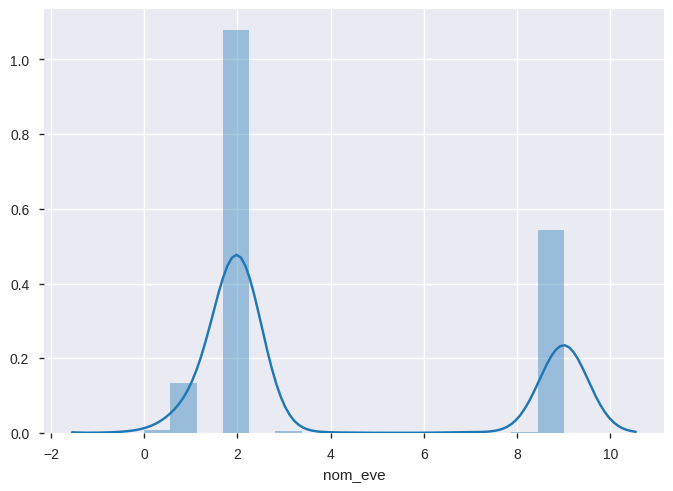

In [14]:
#Visualizacion de la distribucion de nuestra variable
sns.distplot(df_label_encoder['nom_eve']);

In [0]:
#Asimetria y curtosis de la distribucion para saber que tan gordita y asimetrica esta
print("Asimetria: %f" % df_label_encoder['nom_eve'].skew())
print("Curtosis: %f" % df_label_encoder['nom_eve'].kurt())

Asimetria: 0.802804
Curtosis: -1.305710


#### Relaciones con nuestra seleccion de variables

##### Relaciones con variables numericas

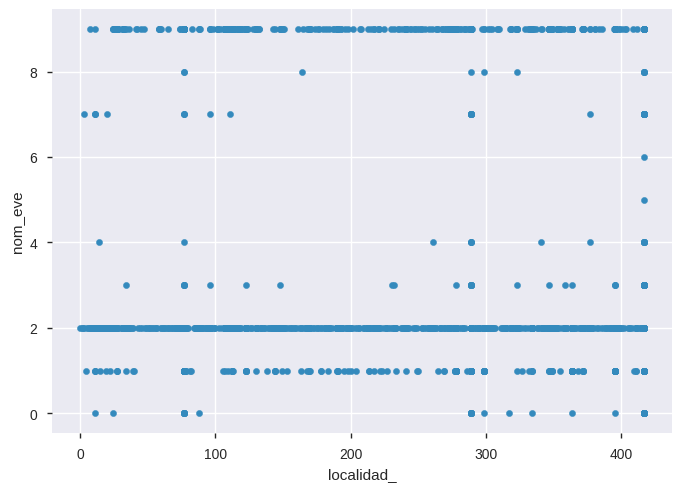

In [15]:
#scatter plot
var = 'localidad_' #Aqui va el nombre de la variable que vamos a comparar
data = pd.concat([df_label_encoder['nom_eve'], df_label_encoder[var]], axis=1)
data.plot.scatter(x=var, y='nom_eve');

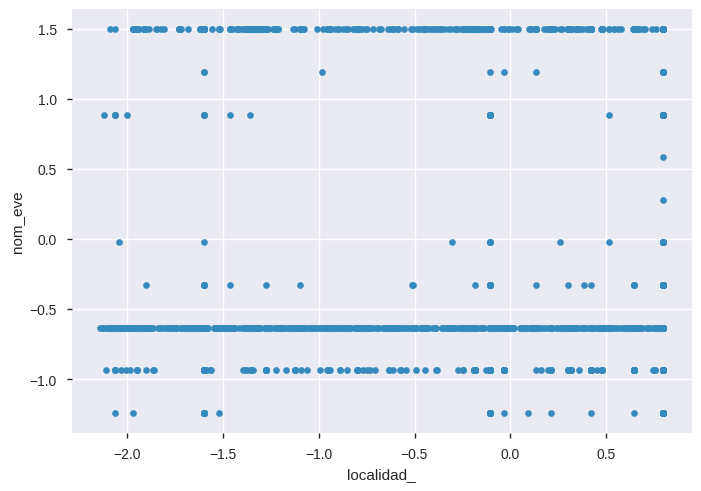

In [0]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

data_normalizado = escalador.fit_transform(data)
data_normalizado = pd.DataFrame(data_normalizado, columns = data.columns)
data_normalizado.plot.scatter(x=var, y='nom_eve');

#### Conclusiones de la revision univariable
Luego de que graficaras y vieras las relaciones de todas las variables que escojiste con la variable principal.

**¿Que podemos concluir?**

### Estudio multivariable
A diferencia del paso anterior, en esta parte no nos enfocamos en una variable sino en llegar a comparar todas con todas.

#### Grafica de todos contra todos

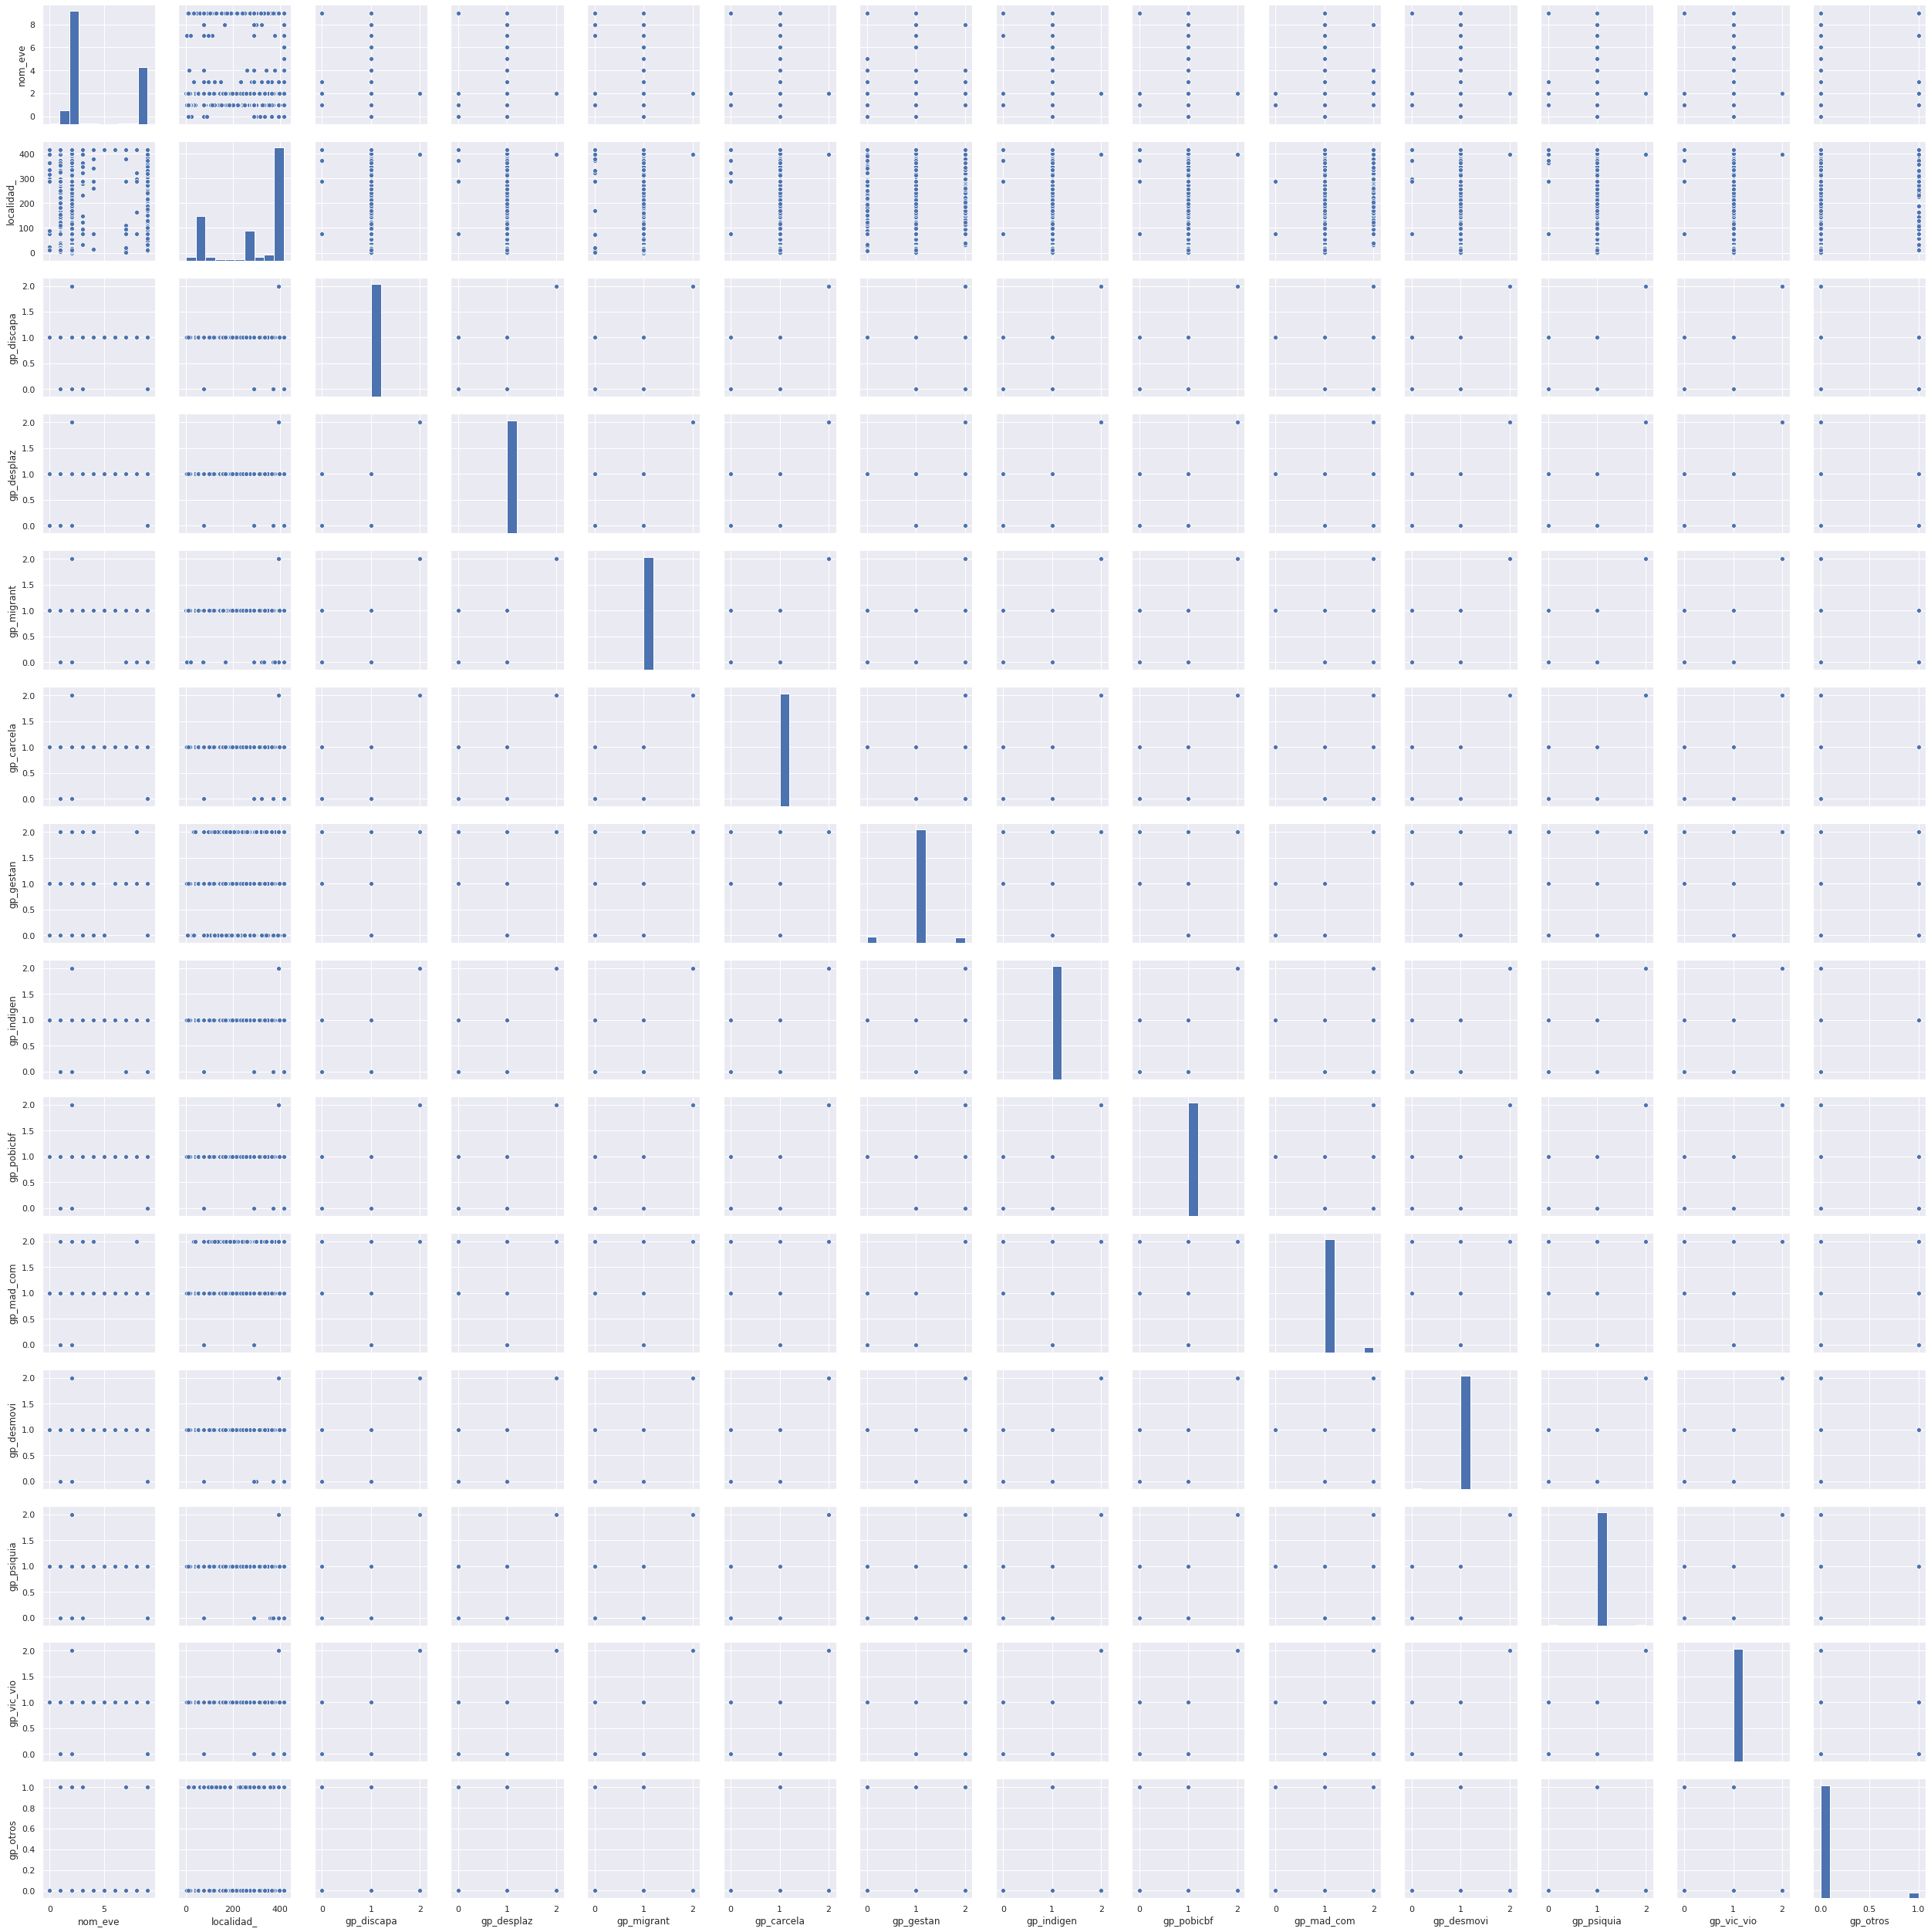

In [0]:
#scatterplot
sns.set()
cols = ['nom_eve', 'localidad_', 'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela', 'gp_gestan',
       'gp_indigen', 'gp_pobicbf', 'gp_mad_com', 'gp_desmovi', 'gp_psiquia',
       'gp_vic_vio', 'gp_otros'] # Aqui ponemos todas las variables que escojimos
sns.pairplot(df_label_encoder[cols], size = 2.5)
plt.show();

# Referencia

- [Analisis exploratorio de Datos de House Pricing Dataset](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- [Analisis exploratorio de Datos de Titanic Dataset](https://github.com/masumrumi/Titanic_Kaggle)
- [Codificaciones sobre los datos con Scikit-Learn](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)
- [Agrupaciones de datos con Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
